In [ ]:
#Muaz Mearri 708241006 
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from matplotlib.colors import ListedColormap

# Set configuration constants
PLOT_SIZE = (8, 6)
RANDOM_STATE = 42
TEST_SIZE = 0.1
%matplotlib inline

In [ ]:
# Helper functions for visualization
def plot_data(X, y, title):
    # Plot raw data without decision boundaries
    plt.figure(figsize=PLOT_SIZE)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolor='k', alpha=0.8)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def plot_decision_boundary(X, y, model, title, show_support_vectors=False):
    # Plot decision boundary with optional support vectors
    h = 0.02  # Step size in mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    # Create the mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict and plot part
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=PLOT_SIZE)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=50, edgecolor='k')
    
   
    if show_support_vectors and hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1], 
                   s=100, facecolors='none', edgecolors='k', linewidths=1.5)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    #Plot confusion matrix for model evaluation
    plt.figure(figsize=PLOT_SIZE)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title, fontsize=14)
    plt.grid(False)
    plt.show()

=== Dataset Generation ===


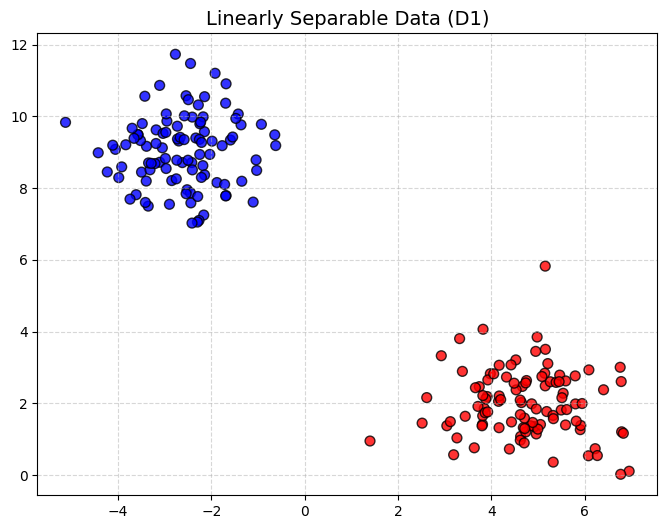

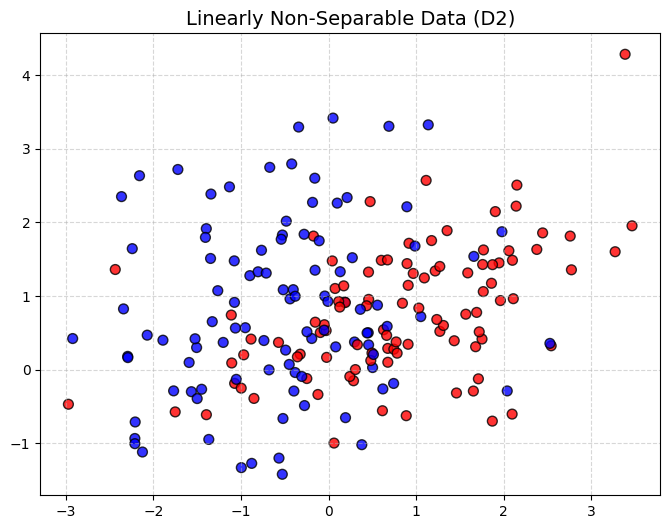

In [ ]:
# Generate and visualize datasets 
print("=== Dataset Generation ===")
X1, y1 = make_blobs(n_samples=200, centers=2, 
                   random_state=RANDOM_STATE, cluster_std=1.0)
plot_data(X1, y1, "Linearly Separable Data (D1)")

X2, y2 = make_classification(n_samples=200, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            flip_y=0.15, class_sep=0.8, random_state=RANDOM_STATE)
plot_data(X2, y2, "Linearly Non-Separable Data (D2)")

In [ ]:
#Train-test split Part
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=TEST_SIZE, stratify=y1, random_state=RANDOM_STATE)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=TEST_SIZE, stratify=y2, random_state=RANDOM_STATE)


=== Hard-margin SVM (Linear Kernel) ===
Test Accuracy: 1.00


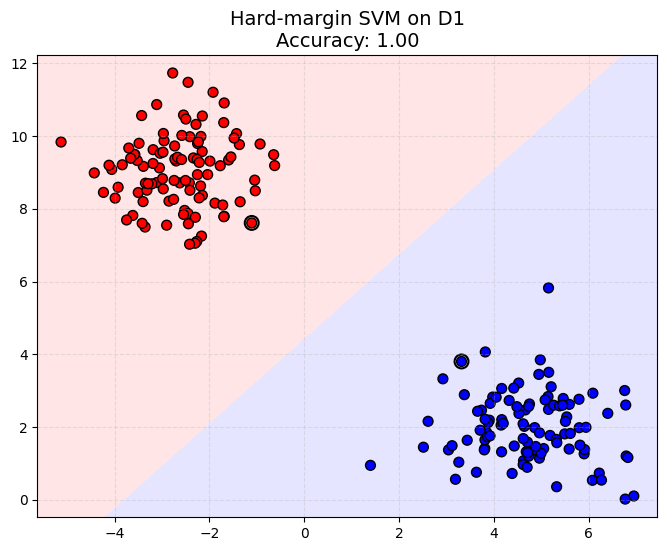

<Figure size 800x600 with 0 Axes>

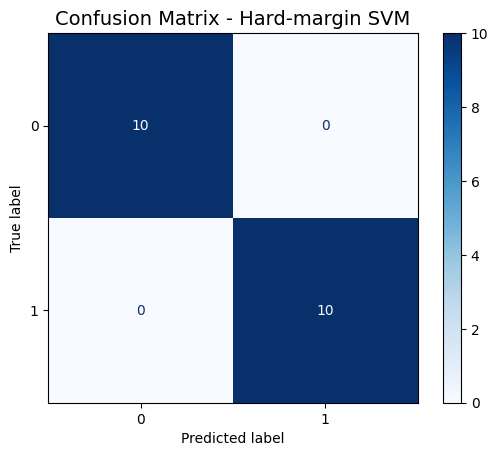

In [ ]:
#Hard-margin SVM on D1 Part
print("\n=== Hard-margin SVM (Linear Kernel) ===")
svm_hard = SVC(kernel='linear', C=1e10)  # Very large C ~ hard margin
svm_hard.fit(X1_train, y1_train)
y1_pred = svm_hard.predict(X1_test)
acc1 = accuracy_score(y1_test, y1_pred)
print(f"Test Accuracy: {acc1:.2f}")

plot_decision_boundary(X1, y1, svm_hard, 
                      f"Hard-margin SVM on D1\nAccuracy: {acc1:.2f}",
                      show_support_vectors=True)
plot_confusion_matrix(y1_test, y1_pred, 
                     "Confusion Matrix - Hard-margin SVM")


=== Soft-margin SVM (RBF Kernel) ===
Test Accuracy: 0.65


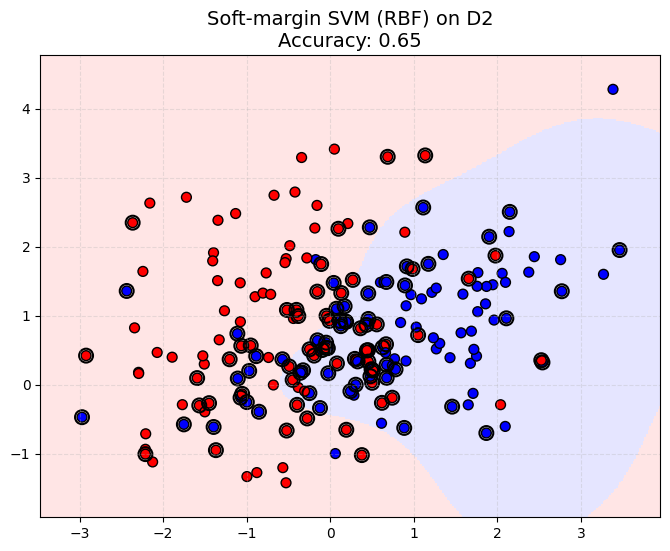

<Figure size 800x600 with 0 Axes>

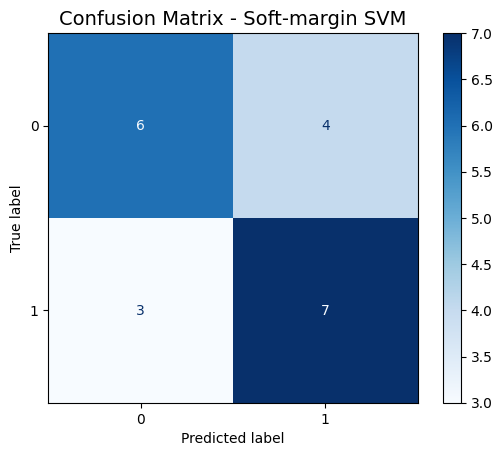

In [ ]:
# Soft-margin SVM on D2 
print("\n=== Soft-margin SVM (RBF Kernel) ===")
svm_soft = SVC(kernel='rbf', C=1.0, gamma=0.5)  # RBF for non-linear data
svm_soft.fit(X2_train, y2_train)
y2_pred = svm_soft.predict(X2_test)
acc2 = accuracy_score(y2_test, y2_pred)
print(f"Test Accuracy: {acc2:.2f}")

plot_decision_boundary(X2, y2, svm_soft, 
                      f"Soft-margin SVM (RBF) on D2\nAccuracy: {acc2:.2f}",
                      show_support_vectors=True)
plot_confusion_matrix(y2_test, y2_pred, 
                     "Confusion Matrix - Soft-margin SVM")


=== MLP Classifier ===

Training MLP on D1...
MLP on D1 Accuracy: 1.00


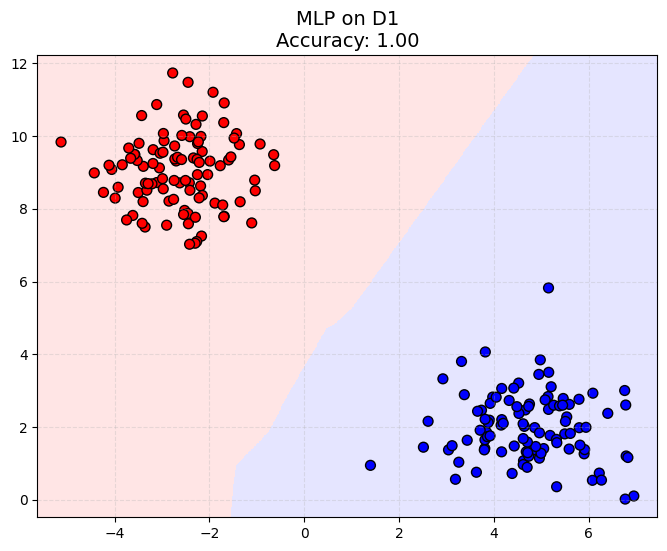

<Figure size 800x600 with 0 Axes>

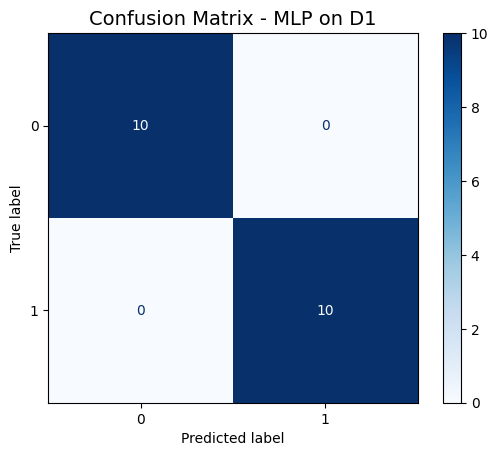


Training MLP on D2...
MLP on D2 Accuracy: 0.80


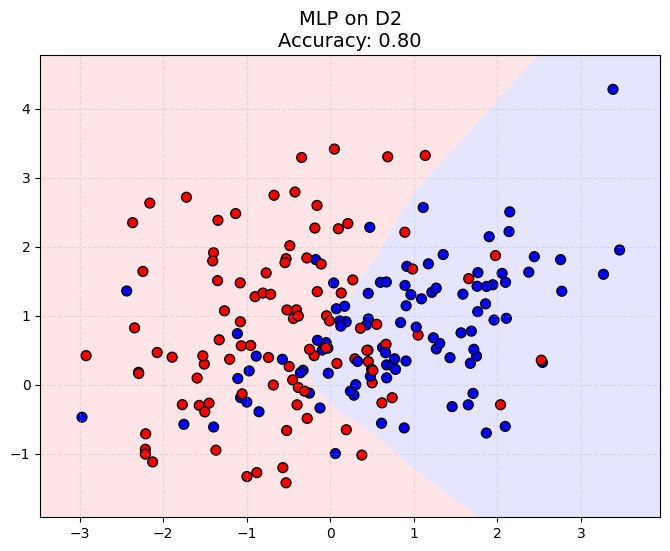

<Figure size 800x600 with 0 Axes>

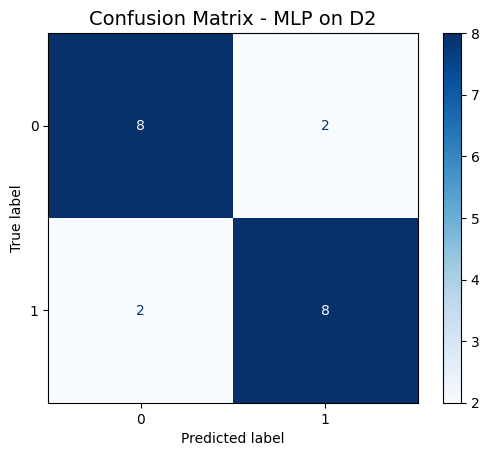

In [ ]:
#MLP Classifier Part
print("\n=== MLP Classifier ===")
mlp = MLPClassifier(hidden_layer_sizes=(10, 10),  # Two hidden layers
                   activation='relu',
                   max_iter=2000,
                   random_state=RANDOM_STATE,
                   alpha=0.01)  # L2 regularization

# MLP on D1
print("\nTraining MLP on D1...")
mlp.fit(X1_train, y1_train)
mlp_acc1 = accuracy_score(y1_test, mlp.predict(X1_test))
print(f"MLP on D1 Accuracy: {mlp_acc1:.2f}")
plot_decision_boundary(X1, y1, mlp, f"MLP on D1\nAccuracy: {mlp_acc1:.2f}")
plot_confusion_matrix(y1_test, mlp.predict(X1_test), "Confusion Matrix - MLP on D1")

# MLP on D2
print("\nTraining MLP on D2...")
mlp.fit(X2_train, y2_train)
mlp_acc2 = accuracy_score(y2_test, mlp.predict(X2_test))
print(f"MLP on D2 Accuracy: {mlp_acc2:.2f}")
plot_decision_boundary(X2, y2, mlp, f"MLP on D2\nAccuracy: {mlp_acc2:.2f}")
plot_confusion_matrix(y2_test, mlp.predict(X2_test), "Confusion Matrix - MLP on D2")

In [ ]:
#Results summary Part
results = pd.DataFrame({
    "Model": ["Hard-margin SVM (Linear)", "Soft-margin SVM (RBF)", "MLP (D1)", "MLP (D2)"],
    "Dataset": ["D1", "D2", "D1", "D2"],
    "Test Accuracy": [acc1, acc2, mlp_acc1, mlp_acc2],
    "Parameters": [
        "C=1e10, kernel=linear",
        "C=1.0, kernel=rbf, gamma=0.5",
        "2x10 hidden, ReLU, α=0.01",
        "2x10 hidden, ReLU, α=0.01"
    ]
})

print("\n=== Final Results ===")
display(results)


=== Final Results ===


,Model,Dataset,Test Accuracy,Parameters
0,Hard-margin SVM (Linear),D1,1.00,"C=1e10, kernel=linear"
1,Soft-margin SVM (RBF),D2,0.65,"C=1.0, kernel=rbf, gamma=0.5"
2,MLP (D1),D1,1.00,"2x10 hidden, ReLU, α=0.01"
3,MLP (D2),D2,0.80,"2x10 hidden, ReLU, α=0.01"
